<a href="https://colab.research.google.com/github/LuiguiUNAB/CIENCIA_DATOS_2025/blob/main/EDA_An%C3%A1lisis_exploratorio_de_datos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISIS EXPLORATORIO DE DATOS EDA
Conjunto de técnicas estadísticas, cuyo objetivo es explorar, describir y resumir la naturaleza de los datos y comprender las relaciones exitentes entre las variables de interés minimizando la comprensión del conjunto de datos.

## PASOS DEL EDA
1. Realizar un análisis descriptivo de las variables
2. Re-ajustar tipos de variables, que no sean consistentes en el momento de realizar las operaciones
3. Detectar y tratar datos ausentes (NaN) que nos permitirá procesar adecuadamente variables numéricas.
4. Identificar datos atípicos y tratarlos de forma adecuada. Esto mitigará la distorsión de futuros análisis estadísticos.
5. Realizar un exámen numérico y gráfico de las relaciones entre variables analizadas determinando su grado de correlación.

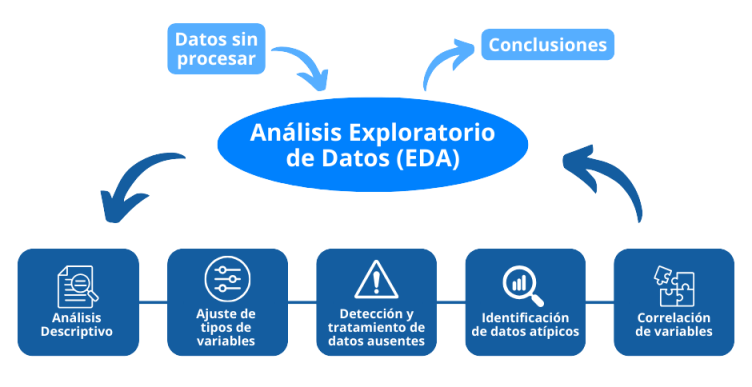

Pregunta objetivo: Jack se salvaba si rose le hacia campito??

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df = pd.read_csv('/content/titanic-train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
# Renombrar las columnas a español
df = df.rename(columns={
    'PassengerId': 'ID_Pasajero',
    'Survived': 'Sobrevivió',
    'Pclass': 'Clase',
    'Name': 'Nombre',
    'Sex': 'Sexo',
    'Age': 'Edad',
    'SibSp': 'Hermanos_Esposos_a_bordo',
    'Parch': 'Padres_Hijos_a_bordo',
    'Ticket': 'Boleto',
    'Fare': 'Tarifa',
    'Cabin': 'Cabina',
    'Embarked': 'Puerto_Embarque'
})
df.columns
# Definir los tipos de datos de las columnas con nombres en español
df = df.astype({
    'ID_Pasajero': 'int64',              # ID del pasajero
    'Sobrevivió': 'int64',               # Sobrevivió (0 = No, 1 = Sí)
    'Clase': 'int64',                    # Clase del pasajero
    'Nombre': 'str',                     # Nombre
    'Sexo': 'str',                       # Sexo
    'Edad': 'float64',                   # Edad
    'Hermanos_Esposos_a_bordo': 'int64', # Hermanos / Esposos a bordo
    'Padres_Hijos_a_bordo': 'int64',     # Padres / Hijos a bordo
    'Boleto': 'str',                     # Número de boleto
    'Tarifa': 'float64',                 # Tarifa pagada
    'Cabina': 'str',                     # Cabina
    'Puerto_Embarque': 'str'             # Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)
})

# Verificar los tipos de datos
print(df.dtypes)




ID_Pasajero                   int64
Sobrevivió                    int64
Clase                         int64
Nombre                       object
Sexo                         object
Edad                        float64
Hermanos_Esposos_a_bordo      int64
Padres_Hijos_a_bordo          int64
Boleto                       object
Tarifa                      float64
Cabina                       object
Puerto_Embarque              object
dtype: object


##1. Análisis descriptivo
Tomar cada una de las características y analizarla

In [108]:
def bar_char(feature):
  Sobrevivio = df[df['Sobrevivió'] == 1][feature].value_counts()
  No_Sobrevivio = df[df['Sobrevivió'] == 0][feature].value_counts()
  test = pd.DataFrame([Sobrevivio,No_Sobrevivio])
  test.index = ['Sobrevivio','No_Sobrevivio']
  test.plot(kind='bar',stacked=True, figsize=(10,5))

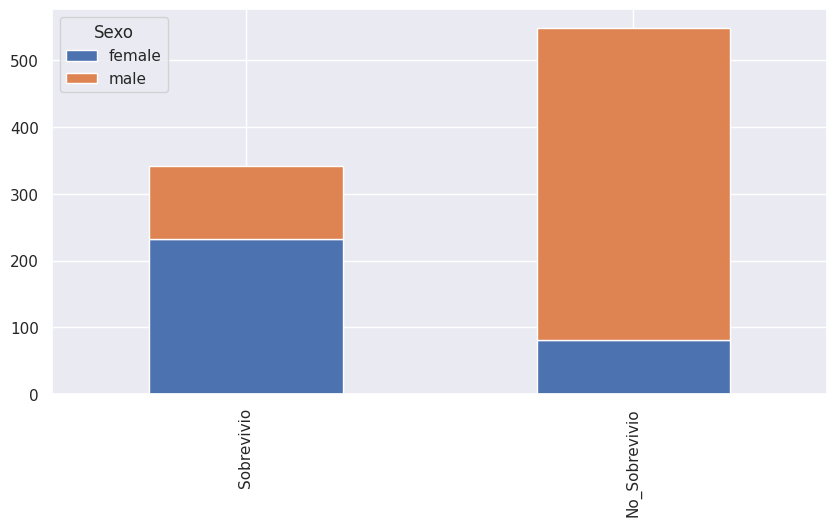

In [109]:
bar_char("Sexo")

Las mujeres tuvieron mayor probabilidad de sobrevivir.

In [110]:
df.columns

Index(['ID_Pasajero', 'Sobrevivió', 'Clase', 'Nombre', 'Sexo', 'Edad',
       'Hermanos_Esposos_a_bordo', 'Padres_Hijos_a_bordo', 'Boleto', 'Tarifa',
       'Cabina', 'Puerto_Embarque'],
      dtype='object')

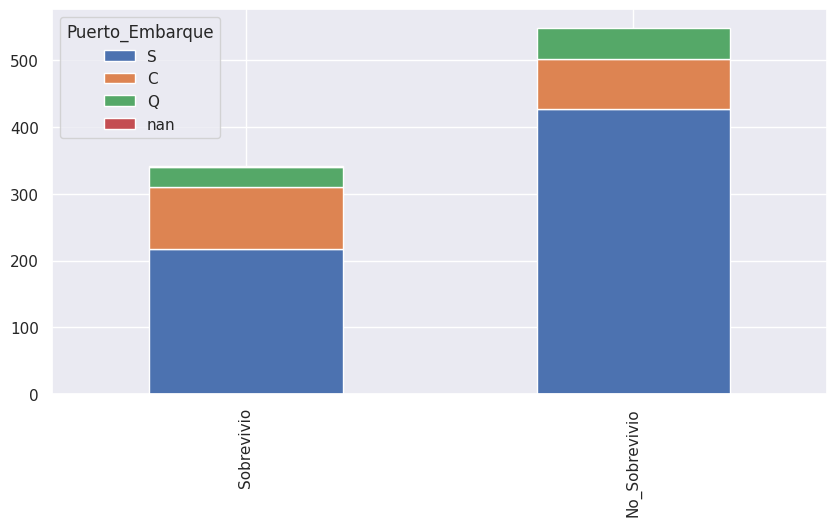

In [111]:
bar_char("Puerto_Embarque")

La gráfica señala que los que se montaron en C tienen mayor probabilidad de supervivencia. Los que se montaron en S tienen menor tasa de supervivencia.

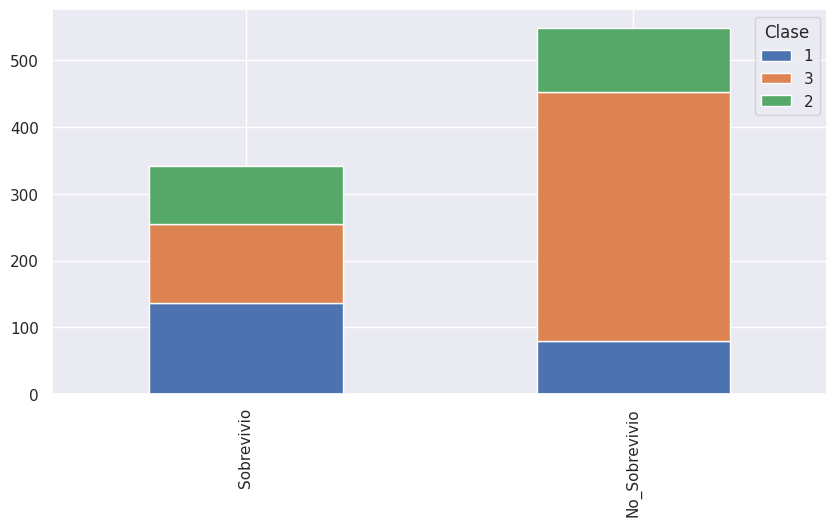

In [112]:
bar_char("Clase")

Pclass 1 tiene mayor probabilidad de sobrevivir con respecto a Pclass 3

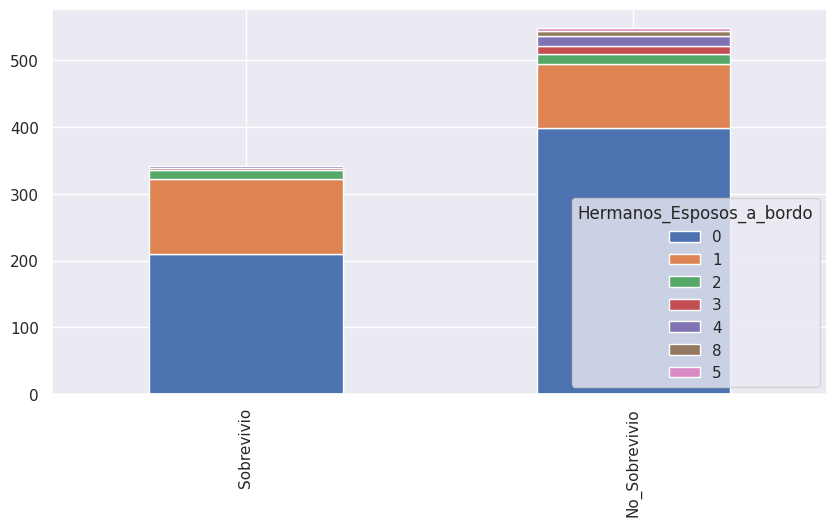

In [113]:
bar_char("Hermanos_Esposos_a_bordo")

Las personas sin familia presentan menor probabilidad de supervivencia en comparación con aquellas casadas con familia  

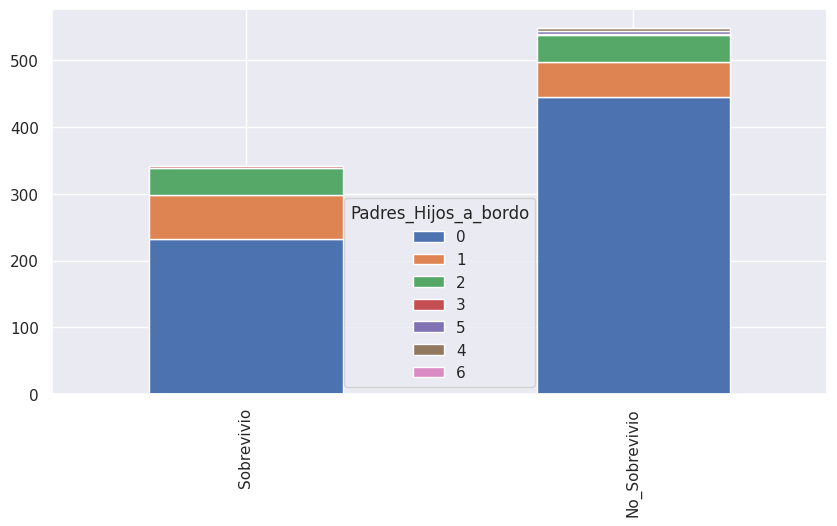

In [114]:
bar_char("Padres_Hijos_a_bordo")

La gráfica muestra que la probabilidad de supervivencia aumentaba si tenías entre 1 y 3 hijos, disminuía si no tienes hijos o tienes más de 3 hijos

## Ingeniería de características
Es el proceso de usar el dominio del conocimiento para crear nuevas características (feature_vector) que logre que loa algoritmos de machine learning funcionen adecuadamente.

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_Pasajero               891 non-null    int64  
 1   Sobrevivió                891 non-null    int64  
 2   Clase                     891 non-null    int64  
 3   Nombre                    891 non-null    object 
 4   Sexo                      891 non-null    object 
 5   Edad                      714 non-null    float64
 6   Hermanos_Esposos_a_bordo  891 non-null    int64  
 7   Padres_Hijos_a_bordo      891 non-null    int64  
 8   Boleto                    891 non-null    object 
 9   Tarifa                    891 non-null    float64
 10  Cabina                    891 non-null    object 
 11  Puerto_Embarque           891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
df.sample(10)

,ID_Pasajero,Sobrevivió,Clase,Nombre,Sexo,Edad,Hermanos_Esposos_a_bordo,Padres_Hijos_a_bordo,Boleto,Tarifa,Cabina,Puerto_Embarque
739,740,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,nan,S
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,nan,S
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,nan,S
814,815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.0500,nan,S
515,516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,nan,S
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,nan,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,nan,S


2. Creando feature vectors

In [117]:
def extit(data):
  title = data["Nombre"].str.extract(r"([A-Z,a-z]+)\.",expand=True)
  return title

In [118]:
df["Title"] = extit(df)

In [119]:
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


###2.1 Creando un mapeo de títulos
Para ello reemplazamos los títulos con los siguientes valores
* Mr : 0
* Miss : 1
* Mrs : 2
* Otros : 3

In [120]:
def reptit(data):
  titmap = {"Mr":0, "Miss":1, "Mrs":2}
  data["Title"] = data["Title"].map(titmap).fillna(3)
  return data

In [121]:
df = reptit(df)
df.head()

,ID_Pasajero,Sobrevivió,Clase,Nombre,Sexo,Edad,Hermanos_Esposos_a_bordo,Padres_Hijos_a_bordo,Boleto,Tarifa,Cabina,Puerto_Embarque,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,S,0.0


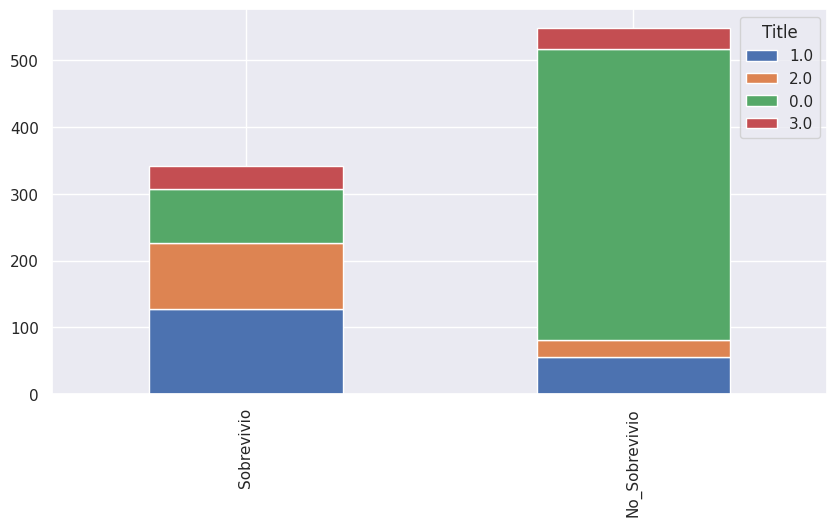

In [122]:
bar_char("Title")

In [123]:
# Eliminar la información innecesaria
df.drop(["Nombre","Cabina","Boleto"],axis=1,inplace=True)


In [124]:
df.head()

,ID_Pasajero,Sobrevivió,Clase,Sexo,Edad,Hermanos_Esposos_a_bordo,Padres_Hijos_a_bordo,Tarifa,Puerto_Embarque,Title
0,1,0,3,male,22.0,1,0,7.2500,S,0.0
1,2,1,1,female,38.0,1,0,71.2833,C,2.0
2,3,1,3,female,26.0,0,0,7.9250,S,1.0
3,4,1,1,female,35.0,1,0,53.1000,S,2.0
4,5,0,3,male,35.0,0,0,8.0500,S,0.0


In [125]:
### 2.2 Reparando la edad
tam = df.groupby("Title")["Edad"].mean()
tam

,Edad
Title,
0.0,32.368090
1.0,21.773973
2.0,35.898148
3.0,20.430161


##2.4 Binning
Convertir una variable numérica a categórica, en este caso, la edad
Mapear el feature vector
* niños :0
* Joven : 1
* adulto : 2
* edad madura : 3
* edad avanzada : 4

In [129]:
df["Categoriaed"] = pd.cut(df["Edad"],bins = [0,16,26,36,62, float("inf")],labels=["Niños","Joven","Adulto","Edad madura","Edad avanzada"])

In [131]:
df.head()

,ID_Pasajero,Sobrevivió,Clase,Sexo,Edad,Hermanos_Esposos_a_bordo,Padres_Hijos_a_bordo,Tarifa,Puerto_Embarque,Title,Categoriaed
0,1,0,3,male,22.0,1,0,7.2500,S,0.0,Joven
1,2,1,1,female,38.0,1,0,71.2833,C,2.0,Edad madura
2,3,1,3,female,26.0,0,0,7.9250,S,1.0,Joven
3,4,1,1,female,35.0,1,0,53.1000,S,2.0,Adulto
4,5,0,3,male,35.0,0,0,8.0500,S,0.0,Adulto


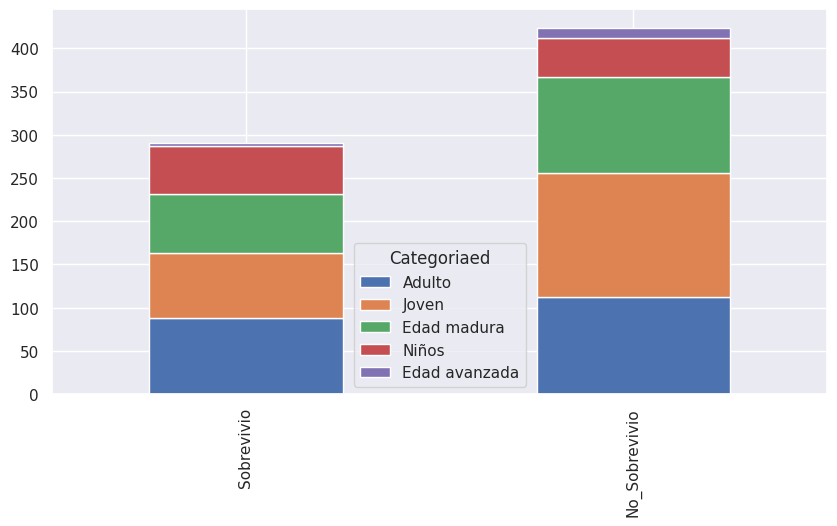

In [132]:
bar_char("Categoriaed")

In [ ]:
###Tarea analizar con el FARE.